In [20]:
import os
import random
import argparse
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

font_path = "/Users/ys/Library/Fonts/Cambria.ttf"
font = matplotlib.font_manager.FontProperties(fname=font_path)

from matplotlib import rc
rc('font',**{'family':'sans-serif'})

In [21]:
fnames = []
snames = []
element_cms = []
cms = []
probs = []
for fp in os.listdir("./tmpdata"):
    fn, sn = fp.split(".")[0].split("-")
    with open(os.path.join("./tmpdata", fp), "rb") as f:
        p, ecm, cm = pickle.load(f)
    probs.append(p)
    fnames.append(fn)
    snames.append(sn)
    element_cms.append(ecm)
    cms.append(cm)

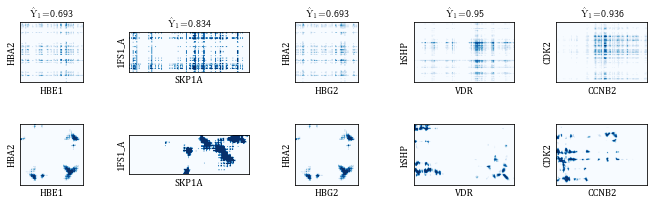

In [22]:
seed = 9
# ids = random.sample(range(len(probs)), 5)
ids = [5, 9, 0, 7, 2]

fig, subs = plt.subplots(nrows=2, ncols=5, figsize=(12, 3))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.7)


for idx, _id in enumerate(ids):
    ecm = element_cms[_id]
    cm = cms[_id]
    fn = fnames[_id]
    sn = snames[_id]
    p = float(probs[_id])

    subs[0][idx].imshow(ecm, cmap="Blues")
    subs[0][idx].set_title(r"$\hat{\mathrm{Y}}_1$=" + f"{round(p, 3)}", fontproperties=font, usetex=True)
    subs[0][idx].set_ylabel(fn, fontproperties=font)
    subs[0][idx].set_xlabel(sn, fontproperties=font)
    subs[0][idx].set_xticks([])
    subs[0][idx].set_yticks([])

    subs[1][idx].imshow(cm, cmap="Blues")
    subs[1][idx].set_ylabel(fn, fontproperties=font)
    subs[1][idx].set_xlabel(sn, fontproperties=font)
    subs[1][idx].set_xticks([])
    subs[1][idx].set_yticks([])

plt.savefig("cm_compare.pdf", bbox_inches='tight')